#                                           Machine Learning


## Project : Anomaly detection in Network traffic data
## Objective : Predict 'DoS' attack (Building a network intrusion detection system)
## Machine Learning Technique : Classification





#### Data Source : A synthetic dataset created by IXIA PerfectStorm tool in the Cyber Range Lab of the Australian Centre for Cyber Security (ACCS) for generating a hybrid of real modern normal activities and synthetic contemporary attack behaviours. The original dataset has 2 million records and 45 features covering nine type of attacks namely Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode and Worms.

#### More informaiton can be found @ https://www.unsw.adfa.edu.au/australian-centre-for-cyber-security/cybersecurity/ADFA-NB15-Datasets/


#### Data courtesy and research authors : 
1.   Nour Moustafa: e-mail nour.abdelhameed@student.adfa.edu.au
2.	Jill Slay: e-mail j.slay@adfa.edu.au

The details of the UNSW-NB15 data set are published in following the papers:
Moustafa, Nour, and Jill Slay. "UNSW-NB15: a comprehensive data set for network intrusion detection systems (UNSW-NB15 network data set)."Military Communications and Information Systems Conference (MilCIS), 2015. IEEE, 2015.
Moustafa, Nour, and Jill Slay. "The evaluation of Network Anomaly Detection Systems: Statistical analysis of the UNSW-NB15 data set and the comparison with the KDD99 data set." Information Security Journal: A Global Perspective (2016): 1-14.



Please Note:  While anomaly detection problems (fraud, network intrusions,disease detection.etc) are usually a 'needle in a haystack' problem, since this is our very first Machine Learning project, I took a sample (25K observations) from the original dataset and tweaked  the data to accomplish the objective

###### Project's Agenda

     1) Machine learning toolkit in Python (Brief intro to pandas, numpy, scikit-learn, matplotlib)
     2) Load the dataset and perform some basic exploratory data analysis
     3) Train a model using a classifier
     4) Test & Evaluate the classifier
     5) Closing remarks

##### Data Acquisition

Please visit my following github account to download all the files from the 'MachineLearning' folder.

Please use the 'clone or download' option to extract all the file at once.  

https://github.com/PDSK/MachineLearning

Please make sure we set the current working directory to reflect the same path as the filepath to which all the above files have been saved



In [39]:
import os

In [40]:
#to get the current directory
os.getcwd()

'C:\\Users\\Phani\\Documents\\UAH\\Adtran'

In [41]:
##change the active directory to a place where you have downloaded all the file from github. Please pass the filepath
   # in the following command in the same format as you see above i.e with double \\
    
os.chdir('C:\\Users\\Phani\\Documents\\UAH\\Adtran')


# Software Installation and Getting Ready

We will install data science platform called 'Anaconda' which installs both python and jupyter notebook. Jupyter notebooks are a great way to share reproducible machine learning work.

Please visit the following weblink and download the latest version of Anaconda based on your OS (windows/linux/macOS)

https://www.continuum.io/downloads

Anaconda is the leading open data science platform powered by Python. The open source version of Anaconda is a high performance distribution of Python and R and includes over 100 of the most popular Python, R and Scala packages for data science.

Once you install Anaconda, 

from the start-up menu, please search for a folder named 'Anaconda' and look for 'Jupyter Notebook'. Please select this option to open Jupyter Notebook. This selection will automatically open a console window and a webpage for Jupyter Notebook.

In [42]:
from IPython.display import Image

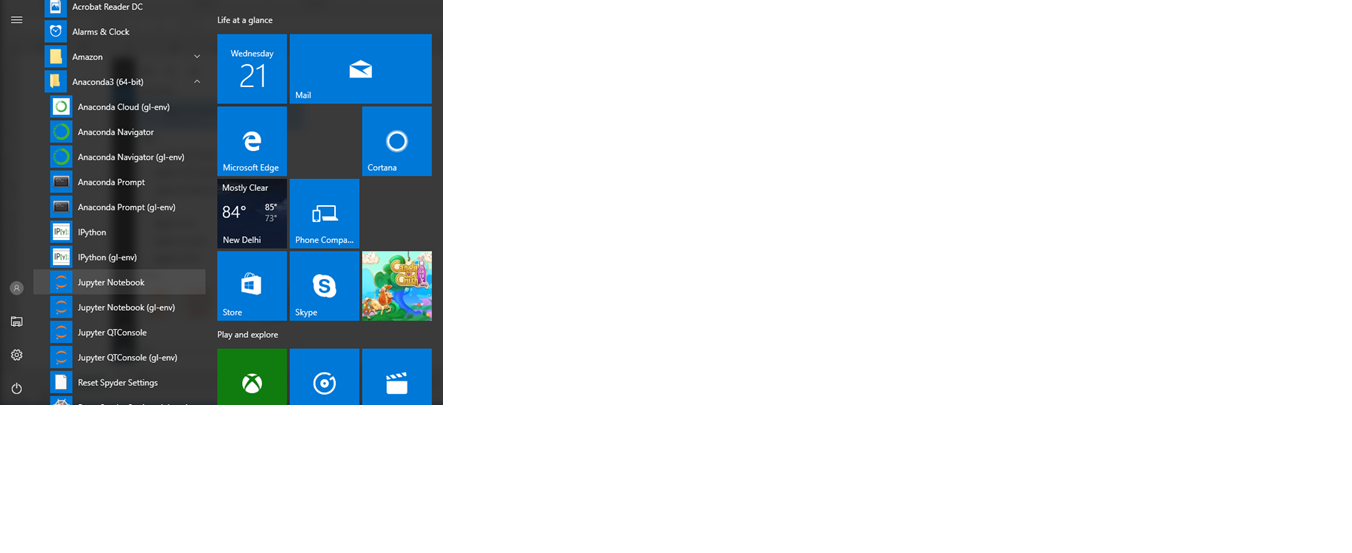

In [43]:
Image('Image3.png')

To open an instance of a new Jupyter notebook. 

File >> New Notebook >> Python [default] 

You should ideally have all the packages installed by default. Else you can always install a new library the following way for each of the individual libraries

  !pip install pandas 

  !pip install numpy

  !pip install scikit-learn

  !pip install missingno

  !pip install seaborn

  !pip install matplotlib



Let's get started

## STEP 1: Machine Learning toolkit in Python

Python provides a rich eco system of libraries for machine learning, following are the most popular and frequently used    libraries followed by their purpose

Numpy(numerical computation in python) ;
Pandas(data analysis) ;
matplotlib (data visualization) ;
scikit-learn (machine learning algorithms) ; 

You might see other libraries in the current project, please do not worry about them right now, we will cover them in furture sessions

Let us now load all the libraries that we will use

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, classification_report

## STEP 2: Load the dataset and perform some basic exploratory data analysis 

In [45]:
#read the dataset in to a pandas dataframe (dataframe is a native format of pandas to store any 2D data)

dataframe = pd.read_csv('training_data1.csv')

Let us take a look at the dimensions of the data i.e. number of observations and number of  features

In [46]:
dataframe.shape

(24999, 45)

The above results indicate that there are 24999 observations or rows and 45 features or columns

Each feature indicates a netowrk traffic data aspect for example : Transaction protocol, packet counts, transaction bytes, time to live value, bits per second, packets retransmitted or dropped..etc

Let us take a look at the sample (5 observations) of the raw data

In [47]:
#head() is a nice way to take a firstlook at the data without loading the entire dataset
dataframe.head(5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,49000,0.000009,encap,-,INT,2,0,200,0,111111.1072,...,1,2,0,0,0,2,2,0,DoS,1
1,49007,0.000007,gmtp,-,INT,2,0,200,0,142857.1409,...,2,2,0,0,0,27,2,0,DoS,1
2,49008,0.000007,gmtp,-,INT,2,0,200,0,142857.1409,...,2,2,0,0,0,27,2,0,DoS,1
3,49040,0.000009,ifmp,-,INT,2,0,200,0,111111.1072,...,1,2,0,0,0,1,2,0,DoS,1
4,49053,0.000009,aris,-,INT,2,0,200,0,111111.1072,...,2,4,0,0,0,2,4,0,DoS,1


Let us take a look at the names of all the features

In [48]:
dataframe.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

While the above feature names are not self-explanatory, a detailed description of these features are provided below 

dur: Record total duration;
proto: Transaction protocol;
service: http, ftp, smtp, ssh, dns, ftp-data ,irc  and (-) if not much used service;
state: Indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) (if not used state);
spkts: Source to destination packet count ;
dpkts: Destination to source packet count;
sbytes: Source to destination transaction bytes ;
dbytes: Destination to source transaction bytes;
sttl: Source to destination time to live value ;
dttl: Destination to source time to live value;
sload: Source bits per second;
dload: Destination bits per second;
sloss: Source packets retransmitted or dropped ;
dloss: Destination packets retransmitted or dropped;
sjit: Source jitter (mSec);
djit: Destination jitter (mSec);
swin: Source TCP window advertisement value;
stcpb: Source TCP base sequence number;
dtcpb: Destination TCP base sequence number;
dwin: Destination TCP window advertisement value;
tcprtt: TCP connection setup round-trip time, the sum of ’synack’ and ’ackdat’.;
synack: TCP connection setup time, the time between the SYN and the SYN_ACK packets.;
ackdat: TCP connection setup time, the time between the SYN_ACK and the ACK packets.;
trans_depth: Represents the pipelined depth into the connection of http request/response transaction;
ct_srv_src: No. of connections that contain the same service (14) and source address (1) in 100 connections according to the last time (26).;
ct_state_ttl: No. for each state (6) according to specific range of values for source/destination time to live (10) (11).;
ct_dst_ltm: No. of connections of the same destination address (3) in 100 connections according to the last time (26).;
ct_src_dport_ltm: No of connections of the same source address (1) and the destination port (4) in 100 connections according to the last time (26).;
ct_dst_sport_ltm: No of connections of the same destination address (3) and the source port (2) in 100 connections according to the last time (26).;
ct_dst_src_ltm: No of connections of the same source (1) and the destination (3) address in in 100 connections according to the last time (26).;
is_ftp_login: If the ftp session is accessed by user and password then 1 else 0. ;
ct_ftp_cmd: No of flows that has a command in ftp session.;
ct_flw_http_mthd: No. of flows that has methods such as Get and Post in http service.;
ct_srv_dst: No. of connections that contain the same service (14) and destination address (3) in 100 connections according to the last time (26).;
is_sm_ips_ports: If source (1) and destination (3)IP addresses equal and port numbers (2)(4)  equal then, this variable takes value 1 else 0;
attack_cat: The name of each attack category. In this data set , nine categories e.g. Fuzzers, Analysis, Backdoors, DoS Exploits, Generic, Reconnaissance, Shellcode and Worms;
label: 0 for normal and 1 for attack records;


Given the set of above 44 features, the objective would be to predict whether a netowrk pattern was 'DoS' or 'Normal'. In most of the machine learning problems, where the target variable (what we intend to predict) is binary in nature i.e. Yes/No, True/False etc, these are coded as '0' for No/False and '1' for Yes/True. So in our case, the feature 'label' indicates '0' for Normal and '1' for 'DoS'

Let us now look at the datatypes in which pandas stored the dataset

In [49]:
dataframe.dtypes.value_counts()

int64      30
float64    11
object      4
dtype: int64

Pandas will try it's best to retain the format of the data as sourced from the original source. The above results indicate that in the training dataframe, 41 features are numerical ( int64 + float64) and 4 are objects. Incase where objects are categorical variable (Yes/No, True/False..etc), we need to check to ensure there are not too many categories which makes it difficult for the model to generealize the features

Let us take a look at a sample of all the features with datatype as 'object'

In [50]:
dataframe.select_dtypes(include =['object']).head()

,proto,service,state,attack_cat
0,encap,-,INT,DoS
1,gmtp,-,INT,DoS
2,gmtp,-,INT,DoS
3,ifmp,-,INT,DoS
4,aris,-,INT,DoS


Let us look at 'how balanced' the current dataset is ; the word "balanced" here refers to how many of the available records are tagged as 'DoS' Vs. 'Normal' [The current dataset was tweaked to reflect a perfect balance i.e. in our dataset 12K or 50% of the records are tagged as 'Normal' and 12K or 50% of records are tagged as 'DoS'. However, in a real world anomaly detection problem, we would be dealing with heavily imbalanced datasets i.e.  approx. < 3% of records will be 'DoS' and 97% of records are 'Normal'  

Let us look at how balanced is our dataset (i.e. how many observations are 'Normal' Vs. 'DoS'

In [51]:
dataframe.attack_cat.value_counts()

Normal    12735
DoS       12264
Name: attack_cat, dtype: int64

For simplicity of this exercise purposes, let us exclude all features with datatype as 'object'.

In [52]:
# we are now creating a new dataframe called 'data' that excludes any features with datatype 'object'
data = dataframe.select_dtypes(exclude =['object'])

In [53]:
#Let us ensure we do not have any features with datatypes as 'object'
data.dtypes.value_counts()

int64      30
float64    11
dtype: int64

The above results indicate that all the features with datatype 'object' are excluded.

Please note a significant amount of time in the model building process is spent in data pre-processing i.e. data cleaning, data imputations, data transformations..etc but considering the objective of this exercise, we will do some basic spot checks and move on to modeling process.

Let us look at the statistical distribution of all the features in the dataset i.e. what's the minimum, maximum, 25%,50%,75% percentile and standard deviation in the data.

In [54]:
round(((data.describe()).T),2)

,count,mean,std,min,25%,50%,75%,max
id,24999.0,5.076951e+04,5.008388e+04,1.0,6250.50,12500.00,9.261450e+04,1.752490e+05
dur,24999.0,1.780000e+00,8.020000e+00,0.0,0.00,0.00,2.700000e-01,6.000000e+01
spkts,24999.0,2.727000e+01,1.657100e+02,1.0,2.00,6.00,2.000000e+01,8.070000e+03
dpkts,24999.0,2.942000e+01,2.054900e+02,0.0,0.00,4.00,1.800000e+01,1.097400e+04
sbytes,24999.0,1.025748e+04,2.077666e+05,46.0,200.00,568.00,1.920000e+03,1.067801e+07
dbytes,24999.0,2.492812e+04,2.731189e+05,0.0,0.00,268.00,2.456000e+03,1.465555e+07
rate,24999.0,7.602639e+04,1.506348e+05,0.0,143.49,2994.01,1.111111e+05,1.000000e+06
sttl,24999.0,1.337600e+02,1.099500e+02,0.0,31.00,62.00,2.540000e+02,2.550000e+02
dttl,24999.0,4.071000e+01,7.289000e+01,0.0,0.00,29.00,2.900000e+01,2.540000e+02
sload,24999.0,6.434472e+07,1.432787e+08,0.0,76939.84,797817.19,8.888889e+07,3.698666e+09


## STEP 3: Train a model using a classifier 

In this step, we divide the dataset in to two parts i.e. trainset and testset. The trainset is used to train the model and testset is used to evaluate how well we trained the model. 

As you might recollect from our session, a supervised learning technique like classification will have inputs (features) and outputs (target or what we want to predict). A common practice in python is to represent all inputs as X and output as Y.

Since scikit-learn works best on numpy arrays, we will first convert our dataset into numpy array


Convert the dataframe as numpy array

In [55]:
array = data.values

Let us now create two numpy array i.e. X for input features and Y for output

In [56]:
X = array[:,0:40]
Y = array[:,40]

Let us now split our dataset(X and Y array) in to training and testing sets. The following commands splits the entire dataset into two parts i.e. training set (representing 67% of the original observations) and testing set (representing the remaining 33% of the original observations). 

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 333)

For this project we will use the 'Logistic Regression' algorithm (one of the most popular algorithms used in binary classification)

In [58]:
model_LR = LogisticRegression()

Let us now train our model using the training set

In [59]:
model_LR.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now that we have trained a model, let us use the testingset to evaluate how well our model as learned.

## STEP 4: Test & Evaluate our model

In [60]:
predicted_LR = model_LR.predict(X_test)

In [61]:
confusionmatrix = confusion_matrix(Y_test,predicted_LR)

In [62]:
confusionmatrix

array([[4109,   88],
       [ 243, 3810]])

In [63]:
score = (confusionmatrix[0,0] + confusionmatrix[1,1])/ float(len(X_test))*100

In [64]:
print("Accuracy is:" + str(round(score,2)) + "%")

Accuracy is:95.99%


The results indicate that our model has really learnt very well as the accuracy to predict a pattern of network traffic data as 'DoS' or 'Normal' is 95.99%

While accuracy % can be used as a quality measure to validate a binary classification model, a much more trusted & reliable set of quality measures to validate the model(especially in anomoly detection) are "f1-score", "precision" and "recall"

In [65]:
print(classification_report(Y_test,predicted_LR))

             precision    recall  f1-score   support

        0.0       0.94      0.98      0.96      4197
        1.0       0.98      0.94      0.96      4053

avg / total       0.96      0.96      0.96      8250



Let us undersatnd these measures a little better. 

Based on the validation results from the testing set, following is the confusion matrix.

1) Precision = of all the patterns predicted as 'DoS' attack by the model, how many(%) are actually 'DoS' attacks.

2) Recall = of all the actual patterns of 'DoS' attacks, how many(%) the model is able to corrected predict as 'DoS' attack.

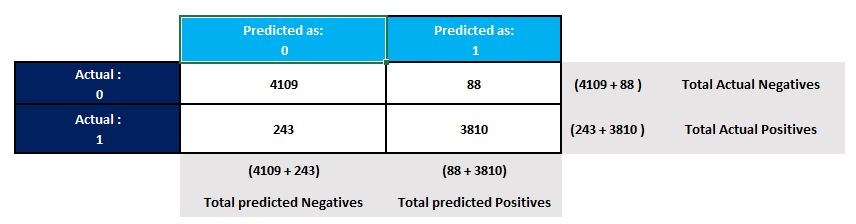

In [66]:
from IPython.display import Image
Image(filename='image1.JPG')


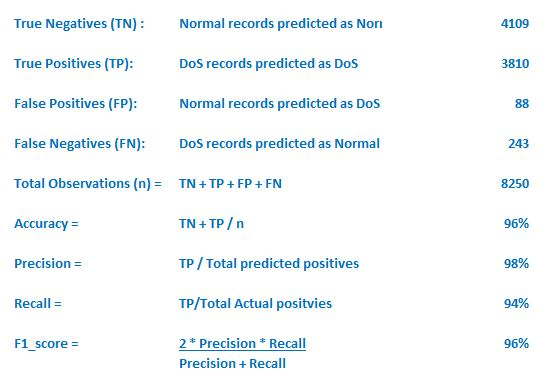

In [67]:
Image(filename='image2.JPG')

## STEP 5: Closing Remarks

Machine Learning is a much more involved process than what we have seen above, since the focus of the project is to get an introducion of the model building and evaluation process, I did not dig deep into the usual machine learning process i.e. data pre-processing, exploratory data analysis, data transformations, feature selection or engineering, spot checking various algorithms, hyper tuning the model, bias-variance trade-off, cross validaitons, accuracy vs. interpretability trade-off, ensembles, validation & model selection. I definitely wish to cover these either in brief or length in future sessions.

For any clarifications/quesitons I am available at

dblue.phani@gmail.com or office # 2144 from 8:30 am to 4:00 pm on Wednesday and Friday of everyweek. 
